## Convolution Responses

In [1]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

Read the image

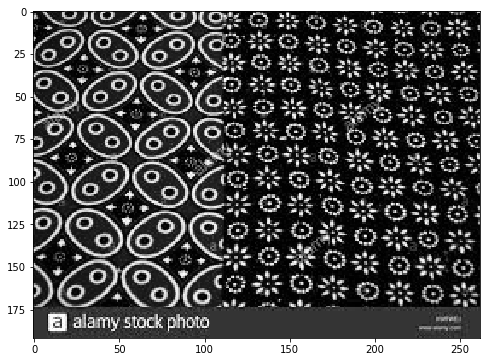

In [2]:
img = imread('circle_img.png')
plt.figure(figsize = (8,10))
plt.imshow(img, cmap='gray')

## 1) Find the centers of flower-like patterns. Let us denote the image by $A\in \mathbb{R}^{H\times W}$.

Recall that the unique solution of the optimization problem 
$$
\begin{cases}
<x, x_0> \longrightarrow max \\
\|x\| = 1
\end{cases}
\qquad \qquad (*)
$$
is $x = \frac{x_0}{\|x_0\|}$.

### If we have a repeated pattern on an image, we can detect it by the following way:
- let's denote an instance of this pattern by $\tilde{\omega}\in \mathbb{R}^{h\times w}$.
- let $\tilde{\omega}$ is repeated in the image on the positions $k_1, k_2, \ldots, k_m$, i.e. the part (of the image $A$) of size $h\times w$ centered in $k_j$th pixel (for $j\in\{1,\ldots, m\}$) is equal (in practise similar) to the pattern $\tilde{\omega}$. We need to find $\{k_1, \ldots, k_m\}$.
- let's denote the part (of the image $A$) of size $h\times w$ centered in $k$th pixel  by $\omega_k$. So, we will get that 
$$
\omega_k \approx \tilde{\omega} \; \mbox{ for } \; k\in\{k_1,\ldots, k_m\}
$$
- so let's determine the $k$s, for which $\omega_k$ is similar to the $\tilde{\omega}$. 
- we define similarity of two vectors $u, v\in \mathbb{R}^{N}$ (here $N = h\cdot w$) by the cross-correlation of them (the problem $(*)$ gives some intuition to interpret this measure as similarity): 
$$
similarity(u,v) = <\frac{u}{\|u_0\|}, \frac{v}{\|v_0\|}>
$$
- so we need to find the $\omega_k$s, for which their cross-correlation with the $\tilde{\omega}$ is high, i.e. the dot product
$$
<\frac{\omega_k}{\|\omega_k\|}, \frac{\tilde{\omega}}{\|\tilde{\omega}\|}>
$$
is high.
- Since the term $\|\tilde{\omega}\|$ does not depend on $k$, we need to find such $k$s, for which $<\frac{\omega_k}{\|\omega_k\|}, \tilde{\omega}>$ is high.


### Hence, let's obtain an image $B$ with $k$th entry equals to $<\frac{\omega_k}{\|\omega_k\|}, \tilde{\omega}>$, then observe high values of $B$.

#### For this we need 
- convolution of the image $A$ with the kernel $\tilde{\omega}$. The result is denoted by $\tilde{A}$. By this we will get that the $k$th entry of $\tilde{A}$ equals to $<\omega_k, \tilde{\omega}>$;
- to obtain the image $\overline{A}$ with $k$th entry equals to $\|\omega_k\|$ ($\overline{A}^2$ can be obtained with the convolution with kernel ones on the image $A^2$);
- to divide $\tilde{A}$ on $\overline{A}$.

In [3]:
import numpy as np
from scipy.signal import convolve2d

In [4]:
def get_pattern(img, kernel): 
    tilde_A = convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0) 
    ones_kernel = np.ones(kernel.shape)
    overline_A = np.sqrt(convolve2d(img*img, ones_kernel, mode='same', boundary='fill', fillvalue=0)) 
    result = tilde_A / overline_A 
    return result

Now as we have the image, it remains to get the instance of the pattern (a flower from the image $A$).

(16, 16)

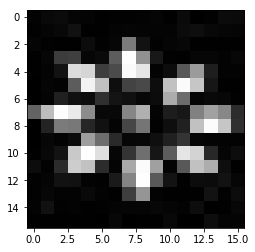

In [5]:
t, l, b, r = 1,175,17,191 
kernel = img[t:b, l:r]
plt.imshow(kernel, cmap=plt.cm.gray)
kernel.shape

Get the image $B$

In [6]:
result = get_pattern(img/255., kernel/255.)

Normalize the image $B$ to get values from [0,1].

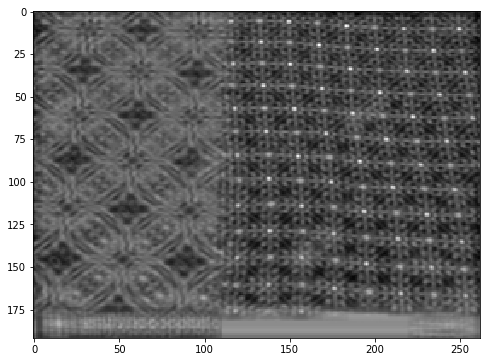

In [7]:
result = result / result.max()
plt.figure(figsize = (8,10))
plt.imshow(result, cmap='gray');

Now let's take from $B$ only high values.

In [8]:
'define some treshold'
treshold = 0.745
centers = result.copy()
centers[result>=treshold] = 1
centers[result<treshold] = 0

Visualize the result

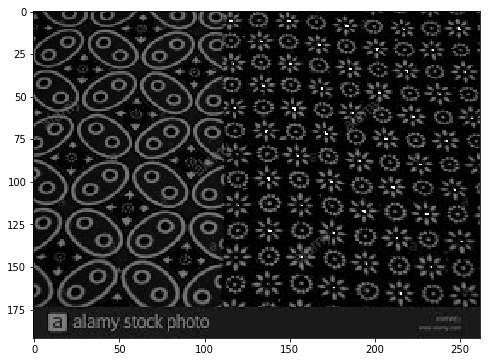

In [9]:
vis = img/255.
vis[centers==1] = 1
vis[centers!=1] *= 0.5
plt.figure(figsize = (8,10))
plt.imshow(vis, cmap=plt.cm.gray)

## 2) Let a video is given. In the video a person is showing some hand gestures. Your task is to determine if at the moment person shows hand palm or not.

## So, find the frames of this video, where the person's gesture is hand palm !

Reading the video-file and partitioning it to frames with frequency 2 frames per second. It will take some time.

In [10]:
import cv2
import time
from tqdm import tqdm
from skimage.color import rgb2gray

In [11]:
vidcap = cv2.VideoCapture('gesture_video.mov')
frames = []
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames, image = vidcap.read()
    if hasFrames:
        frames.append(image)
    return hasFrames

sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
start = time.time()
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
time.time() - start

8.788292646408081

Making the extracted frames grayscaled images:

In [12]:
frames_gr = []
for frame in tqdm(frames):
    frames_gr.append(rgb2gray(frame[:,:,::-1]))

100%|██████████| 69/69 [00:06<00:00, 11.45it/s]


## The rest complete yourself. Try to obtain as high accuracy as possible. Accuracy is measured by the formula $\frac{N_s}{N}$, where $N_s$ is the number of right predictions and $N$ is the number of frames.

### Be creative, you can do it :)

In [13]:
# wrapping into np array
frames_gr = np.array(frames_gr)
frames_gr.shape

(69, 1138, 2106)

In [14]:
height = frames_gr.shape[1]
width = frames_gr.shape[2]

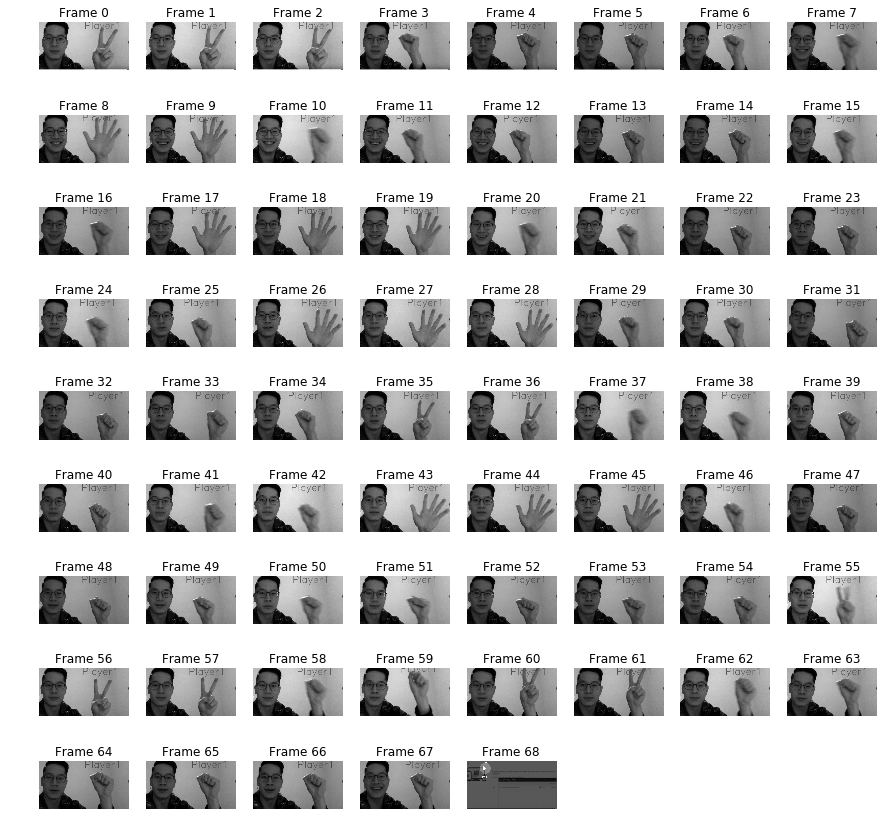

In [15]:
plt.figure(figsize=(15, 15))

#counter
i = 1

for j in range(frames_gr.shape[0]):
    image = frames_gr[j]
    # Define 64 subplots 
    plt.subplot(9, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add 1 to the counter
    i += 1
    plt.title("Frame {0}".format(j))
    plt.imshow(image, cmap=plt.cm.gray)
    
plt.show()

In [16]:
#resizing images
new_width = 256
frames_gr_resized = []

#for keeping ratio between height and width
ratio = new_width / float(width)
dim = (new_width, int(height * ratio))

for img in frames_gr:
    frames_gr_resized.append(cv2.resize(img, dim, interpolation = cv2.INTER_AREA))

In [17]:
frames_gr_resized = np.array(frames_gr_resized)
frames_gr_resized.shape

(69, 138, 256)

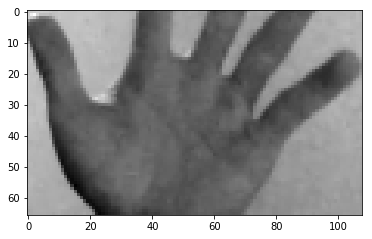

In [18]:
#getting hand palm pattern, let's take it from Frame 45
n = 45
plt.imshow(frames_gr_resized[n],cmap=plt.cm.gray)

#filter
filter = frames_gr_resized[n, 59:125, 140:248]
plt.imshow(filter, cmap='gray');


In [19]:
results = []
for img in frames_gr_resized:
    result = get_pattern(img/255., filter/255.)
    result = result / result.max()
    results.append(result)

In [20]:
results = np.array(results)

In [21]:
treshold = 0.9
treshold_for_count = 11000
conv_results = []

for i in range(len(results)):
    res = results[i].copy()
    
    #number of pixels that are above the treshold
    count = len(res[res>=treshold])
    count_bool = count > treshold_for_count
    print(i,'---',  count_bool," --- ", count)
    
    conv_results.append(count_bool)

0 --- False  ---  10132
1 --- False  ---  10159
2 --- False  ---  10159
3 --- False  ---  9017
4 --- False  ---  10647
5 --- False  ---  10707
6 --- False  ---  10290
7 --- False  ---  10091
8 --- False  ---  9827
9 --- False  ---  9736
10 --- False  ---  10158
11 --- False  ---  9322
12 --- False  ---  9207
13 --- False  ---  10008
14 --- False  ---  10073
15 --- False  ---  10447
16 --- False  ---  10607
17 --- False  ---  10399
18 --- False  ---  10292
19 --- False  ---  10296
20 --- False  ---  10479
21 --- False  ---  9595
22 --- False  ---  10063
23 --- False  ---  10214
24 --- False  ---  10371
25 --- False  ---  10320
26 --- True  ---  11018
27 --- True  ---  11083
28 --- True  ---  11088
29 --- False  ---  10520
30 --- False  ---  10113
31 --- False  ---  10410
32 --- False  ---  10337
33 --- False  ---  10986
34 --- False  ---  9714
35 --- False  ---  10617
36 --- False  ---  10629
37 --- False  ---  10783
38 --- False  ---  10769
39 --- False  ---  10398
40 --- False  ---  1

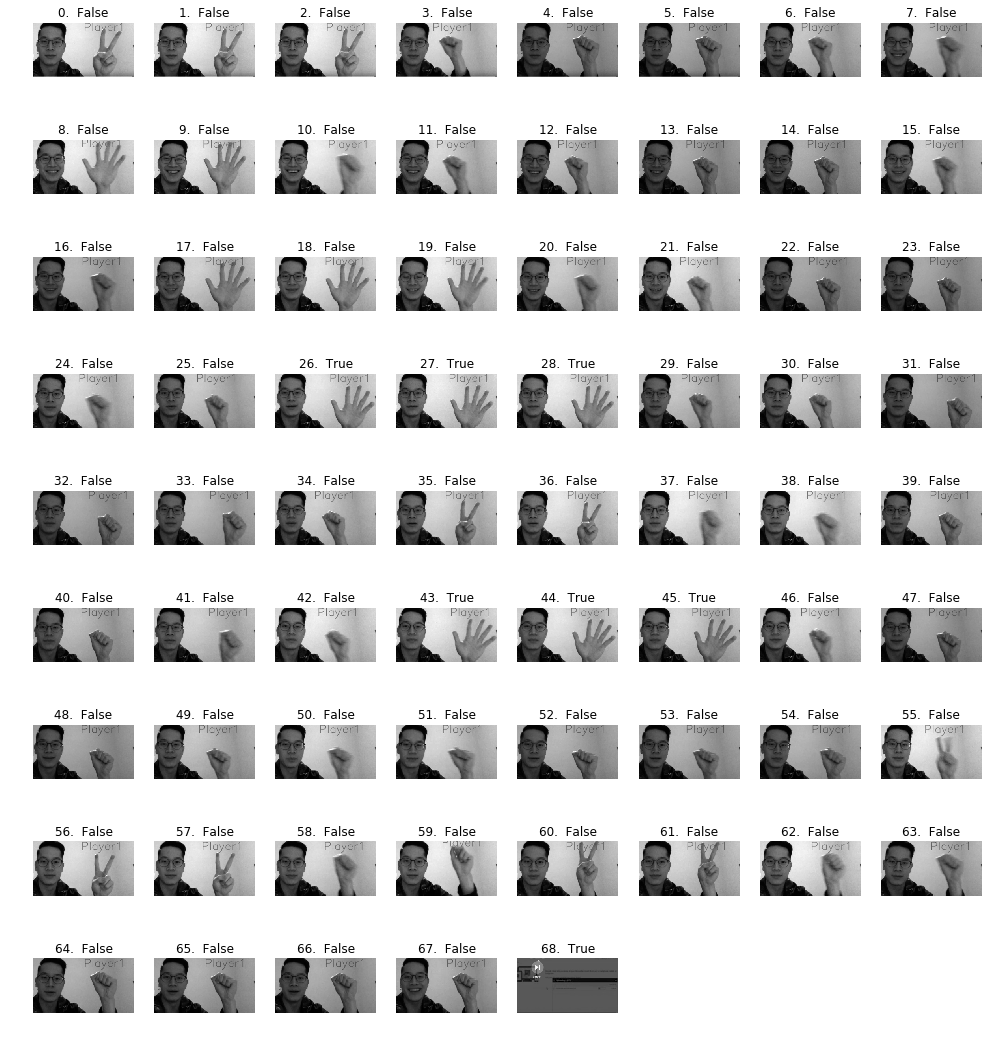

In [22]:
plt.figure(figsize=(17, 19))

#counter
i = 1

for j in range(frames_gr_resized.shape[0]):
    image = frames_gr_resized[j]
    # Define 64 subplots 
    plt.subplot(9, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add 1 to the counter
    i += 1
    plt.title("{0}.  {1}".format(j,conv_results[j]))
    plt.imshow(image, cmap=plt.cm.gray)
    
plt.show()

In [23]:
#Labels
labels = [False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]

In [24]:
num_matches = 0
for i in range(len(labels)):
    if labels[i] == conv_results[i]:
        num_matches +=1 
num_matches        

63

In [25]:
accuracy = 100 * num_matches/69
accuracy

91.30434782608695

In [26]:
# Overall I can guess 6 hand palms from 11, and all not hand palms (besides the last frame)

### Experiment with other filter

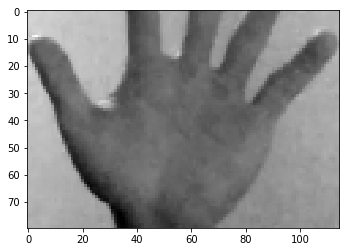

In [27]:
#getting hand palm pattern, let's take it from Frame 17
n = 17
plt.imshow(frames_gr_resized[n],cmap=plt.cm.gray)

#filter
filter2 = frames_gr_resized[n, 45:125, 130:245]
plt.imshow(filter2, cmap='gray');


In [28]:
results2 = []
for img in frames_gr_resized:
    result = get_pattern(img/255., filter2/255.)
    result = result / result.max()
    results2.append(result)
    
results2 = np.array(results2)    

In [29]:
treshold = 0.99
treshold_for_count = 1151
conv_results2 = []

for i in range(len(results2)):
    res = results2[i].copy()
    
    #number of pixels that are above the treshold
    count = len(res[res>=treshold])
    count_bool = count >= treshold_for_count
    print(i,'---',  count_bool," --- ", count)
    
    conv_results2.append(count_bool)

0 --- False  ---  977
1 --- False  ---  941
2 --- False  ---  941
3 --- False  ---  911
4 --- True  ---  1787
5 --- True  ---  1764
6 --- True  ---  2275
7 --- True  ---  1762
8 --- True  ---  1402
9 --- True  ---  1408
10 --- True  ---  1198
11 --- True  ---  2291
12 --- True  ---  1962
13 --- True  ---  1835
14 --- True  ---  1831
15 --- True  ---  2194
16 --- True  ---  1729
17 --- True  ---  1151
18 --- True  ---  1165
19 --- True  ---  1384
20 --- True  ---  1728
21 --- True  ---  1741
22 --- True  ---  1584
23 --- True  ---  1638
24 --- True  ---  2056
25 --- True  ---  1651
26 --- False  ---  1025
27 --- False  ---  912
28 --- False  ---  874
29 --- True  ---  2080
30 --- True  ---  1581
31 --- False  ---  497
32 --- False  ---  635
33 --- False  ---  540
34 --- False  ---  578
35 --- False  ---  820
36 --- False  ---  795
37 --- True  ---  1628
38 --- True  ---  1955
39 --- True  ---  1265
40 --- True  ---  1242
41 --- False  ---  953
42 --- True  ---  1555
43 --- False  ---  1

In [30]:
#why 17th frame score lower than some others, although I use pattern from 17 Frame ????

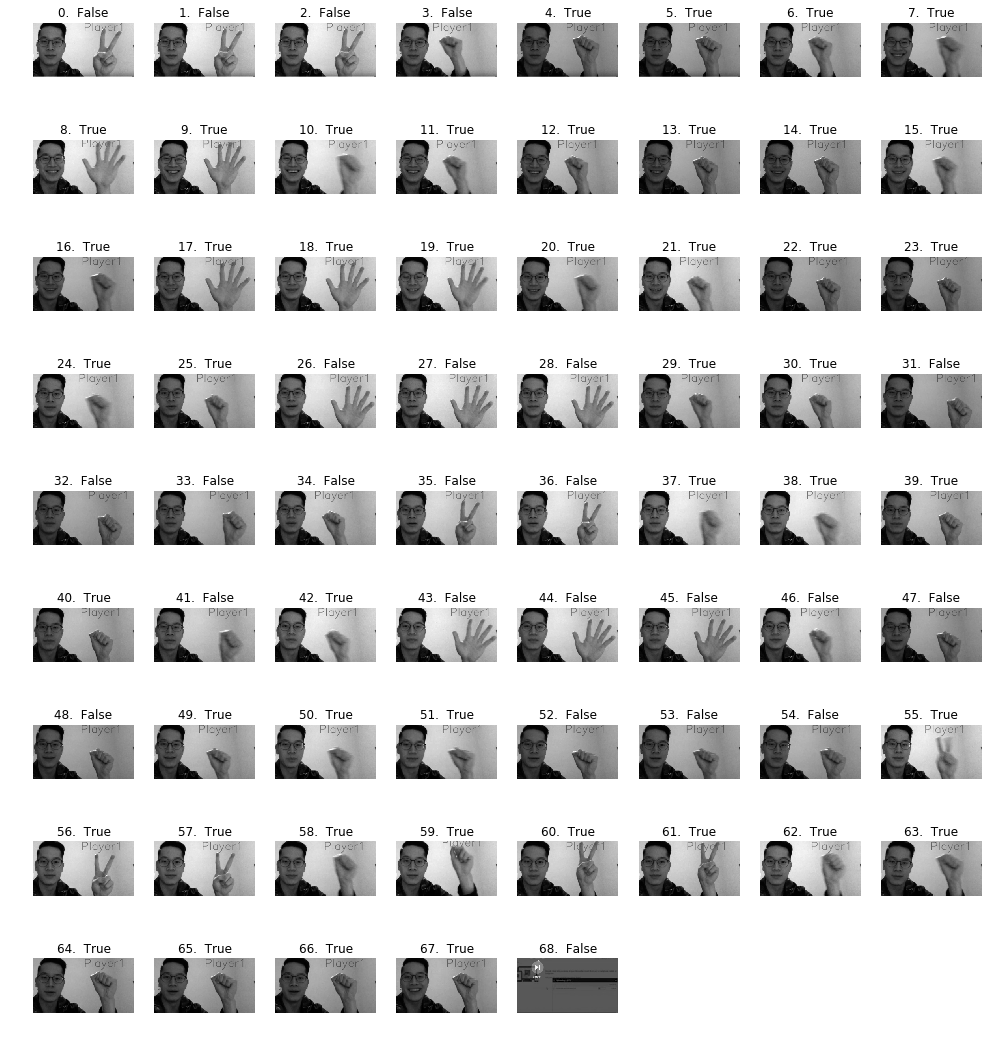

In [31]:
plt.figure(figsize=(17, 19))

#counter
i = 1

for j in range(frames_gr_resized.shape[0]):
    image = frames_gr_resized[j]
    # Define 64 subplots 
    plt.subplot(9, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add 1 to the counter
    i += 1
    plt.title("{0}.  {1}".format(j,conv_results2[j]))
    plt.imshow(image, cmap=plt.cm.gray)
    
plt.show()

In [32]:
num_matches = 0
for i in range(len(labels)):
    if labels[i] == conv_results2[i]:
        num_matches +=1 
num_matches 

23

In [33]:
accuracy = 100 * num_matches/69
accuracy

33.333333333333336